In [4]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse, circle

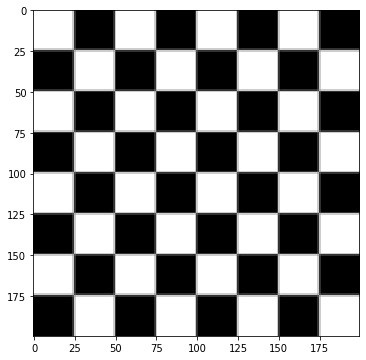

In [5]:
checkerboard = data.checkerboard()

plt.figure(figsize=(6,6))
plt.imshow(checkerboard, cmap='gray')

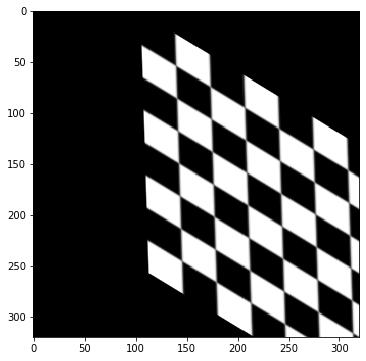

In [7]:
#affine transform allows us to scale rotate shear and translate the images

transform = AffineTransform(scale=(0.9, 0.8), rotation=1, shear=0.6, translation=(150, -80))

warped_checkerboard = warp(checkerboard, transform, output_shape=(320, 320))

plt.figure(figsize=(6,6))
plt.imshow(warped_checkerboard, cmap='gray')

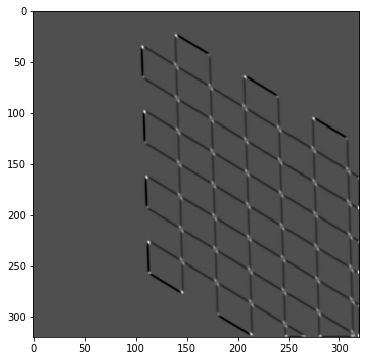

In [9]:
corners = corner_harris(warped_checkerboard)
plt.figure(figsize=(6,6))
plt.imshow(corners, cmap='gray')

In [10]:
coords_peaks = corner_peaks(corners, min_distance=1)

coords_peaks.shape

(104, 2)

In [11]:
coords_subpix = corner_subpix(warped_checkerboard, coords_peaks, window_size=10)

In [12]:
coords_peaks[0:11]

array([[ 24, 140],
       [ 35, 107],
       [ 52, 138],
       [ 56, 141],
       [ 65, 108],
       [ 65, 207],
       [ 73, 172],
       [ 76, 174],
       [ 84, 139],
       [ 84, 239],
       [ 88, 142]], dtype=int64)

In [13]:
coords_subpix[0:11]

array([[ 22.678218  , 138.75079434],
       [ 34.02580381, 106.1266241 ],
       [ 54.20784448, 139.67099374],
       [ 54.36559672, 139.70226486],
       [ 65.68528877, 107.0559618 ],
       [ 63.5966865 , 205.97892805],
       [ 74.66101104, 173.26359611],
       [ 74.74355977, 173.26362267],
       [ 86.0721085 , 140.6525575 ],
       [ 83.74255892, 239.49864943],
       [ 86.25265808, 140.69021517]])

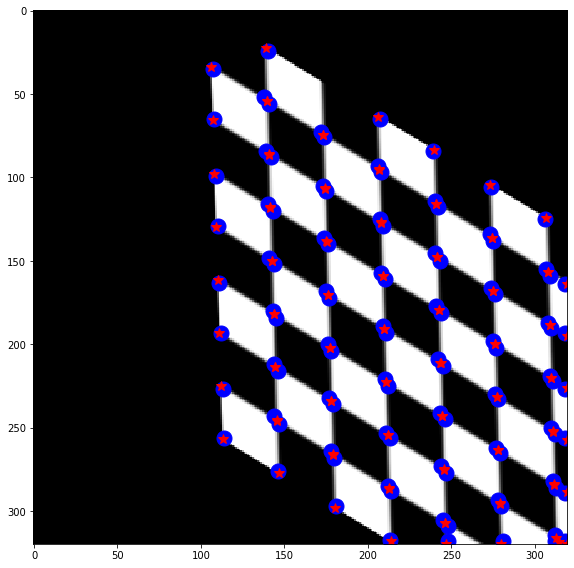

In [15]:
fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(warped_checkerboard, interpolation='nearest', cmap='gray')

ax.plot(coords_peaks[: ,1], coords_peaks[: ,0], '.b', markersize=30)
ax.plot(coords_subpix[: ,1], coords_subpix[: ,0], '*r', markersize=10)

fig.tight_layout()
plt.show()